# A simple neural network framework

In this section, we will build a simple neural network framework and use it to re-implement multiclass logistic regression in the previous section. This framework is also the start point of more advanced models in following sections.

## Multiclass logistic regression

In [1]:
import numpy as np

%matplotlib inline

In [2]:
from dataset import MNIST

train_data = MNIST('data/3/train-images-idx3-ubyte.gz', 'data/3/train-labels-idx1-ubyte.gz')
test_data = MNIST('data/3/t10k-images-idx3-ubyte.gz', 'data/3/t10k-labels-idx1-ubyte.gz')

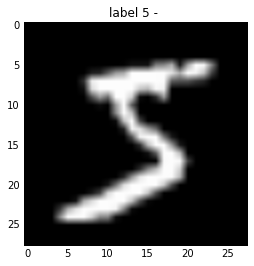

In [3]:
train_data.show_image(0)

In [4]:
num_examples = train_data.size
num_inputs = train_data.num_inputs
num_outputs = train_data.num_outputs

In [5]:
import nn
import neurons

data_layer = nn.BatchDataLayer(train_data.inputs, train_data.outputs, batch_size=64, shuffle=True)
softmax_layer = nn.FullyConnectedLayer(num_inputs, num_outputs, neuron_type=neurons.Softmax)
loss_layer = nn.CrossEntropyLayer(num_inputs=num_outputs)
net = nn.NeuralNetwork(data_layer, [softmax_layer], loss_layer)

In [6]:
epochs = 10
learning_rate = .002

for e in range(epochs):
    loss = net.train(learning_rate)
    # print("param", softmax_layer.parameters())
    # print("grad", softmax_layer.gradient())
    print("loss %f" % loss)

loss 125215.375477
loss 52439.713696
loss 42059.814296
loss 36879.430859
loss 33597.024206
loss 31291.969073
loss 29565.400224
loss 28208.306515
loss 27100.958924
loss 26171.333304


In [7]:
def model_predict(net, x):
    yhat = net.evaluate(x)
    pred = np.argmax(yhat, axis=1)
    return pred

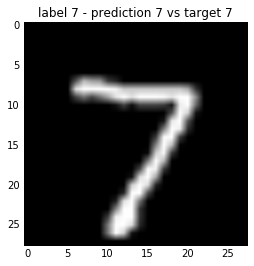

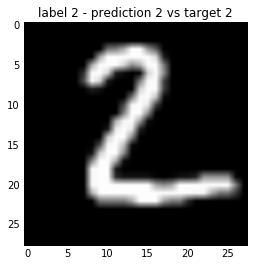

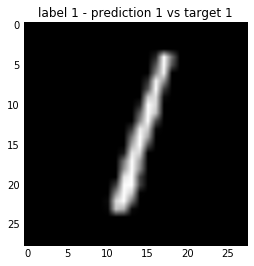

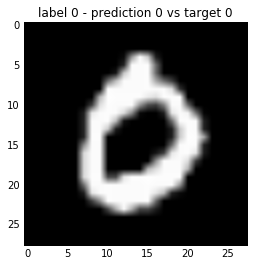

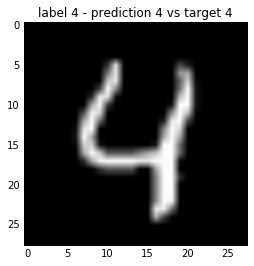

In [8]:
for i in range(5):
    pred_label = model_predict(net, test_data.inputs[np.newaxis, i])
    test_data.show_image(i, "prediction %d vs target %d" % (pred_label, test_data.labels[i]))

In [9]:
pred_labels = model_predict(net, test_data.inputs)
num_correct = np.sum(pred_labels == test_data.labels)
print(num_correct / test_data.size)

0.9011


## Multilayer perceptrons

In [10]:
num_hidden = 256
scale_weight = .01

data_layer = nn.BatchDataLayer(train_data.inputs, train_data.outputs, batch_size=64, shuffle=True)
hidden_layer_1 = nn.FullyConnectedLayer(num_inputs, num_hidden, scale_weight, neurons.ReLU)
hidden_layer_2 = nn.FullyConnectedLayer(num_hidden, num_hidden, scale_weight, neurons.ReLU)
softmax_layer = nn.FullyConnectedLayer(num_hidden, num_outputs, scale_weight, neurons.Softmax)
loss_layer = nn.CrossEntropyLayer(num_inputs=num_outputs)
mlp_net = nn.NeuralNetwork(data_layer, [hidden_layer_1, hidden_layer_2, softmax_layer], loss_layer)

In [11]:
epochs = 10
learning_rate = .002

for e in range(epochs):
    loss = mlp_net.train(learning_rate)
    # print("param", softmax_layer.parameters())
    # print("grad", softmax_layer.gradient())
    print("loss %f" % loss)

loss 49071.038690
loss 11890.073248
loss 7496.469833
loss 5525.098061
loss 4308.344942
loss 3433.476884
loss 2734.021437
loss 2172.387882
loss 1716.980778
loss 1333.111478


In [12]:
pred_labels = model_predict(mlp_net, test_data.inputs)
num_correct = np.sum(pred_labels == test_data.labels)
print(num_correct / test_data.size)

0.9778
